In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotly import __version__
# import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode

#cf.go_offline()

import plotly.figure_factory as ff
import plotly.offline as py

import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools

Section 2:
Importing the Data Set


In [6]:
df = pd.read_csv("./pricepersqft.csv")
df_rent = pd.read_csv("./price.csv")

Lets see what both datasets are about

In [7]:
df.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,0.764,0.766,0.766,0.766,...,0.862,0.870,0.876,0.880,0.882,0.884,0.886,0.890,0.892,0.894
6,18959,Las Vegas,Las Vegas,Clark,NV,7,0.750,0.750,0.748,0.748,...,0.768,0.770,0.772,0.774,0.772,0.774,0.774,0.778,0.780,0.780
7,6915,San Antonio,San Antonio,Bexar,TX,8,0.694,0.698,0.700,0.700,...,0.820,0.822,0.824,0.822,0.822,0.822,0.824,0.830,0.834,0.836
8,54296,San Diego,San Diego,San Diego,CA,9,1.492,1.494,1.492,1.490,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,0.802,0.810,0.818,0.824,...,1.026,1.034,1.040,1.046,1.048,1.050,1.054,1.060,1.062,1.064


In [8]:
df_rent.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.0,1183.0,1178.0,1177.0,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,1239
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391


Brief description of the datasets
1. PPSFT dataset
2. Rent Dataset

In [9]:
df.describe

<bound method NDFrame.describe of        City Code               City         Metro        County State  \
0           6181           New York      New York        Queens    NY   
1          12447        Los Angeles   Los Angeles   Los Angeles    CA   
2          17426            Chicago       Chicago          Cook    IL   
3          39051            Houston       Houston        Harris    TX   
4          13271       Philadelphia  Philadelphia  Philadelphia    PA   
...          ...                ...           ...           ...   ...   
11914     182023            Henrico      Richmond       Henrico    VA   
11915     397405  Highland Township    Gettysburg         Adams    PA   
11916     398343             Urbana       Corning       Steuben    NY   
11917     398839             Angels           NaN     Calaveras    CA   
11918     737788    Lebanon Borough      New York     Hunterdon    NJ   

       Population Rank  November 2010  December 2010  January 2011  \
0                  

In [10]:
df_rent.describe()

,City Code,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,13131.000000,13131.000000,11348.000000,11348.000000,11348.000000,11500.000000,11673.000000,11722.000000,11732.000000,11732.000000,...,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,78126.756454,6566.000000,1327.100458,1331.831953,1334.447744,1331.935217,1327.595819,1323.824518,1321.730822,1321.872826,...,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636,1467.296550
std,119604.910806,3790.737527,652.531343,655.822002,653.931315,647.853483,640.168818,636.392831,633.675563,631.981504,...,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626,820.707579
min,3300.000000,1.000000,547.000000,539.000000,536.000000,542.000000,535.000000,533.000000,533.000000,536.000000,...,543.000000,548.000000,547.000000,544.000000,539.000000,532.000000,527.000000,518.000000,517.000000,518.000000
25%,18803.000000,3283.500000,982.000000,984.750000,986.000000,984.000000,979.000000,973.000000,971.000000,972.000000,...,1041.000000,1044.000000,1046.000000,1043.500000,1038.000000,1034.000000,1032.000000,1033.000000,1034.000000,1035.000000
50%,34678.000000,6566.000000,1195.000000,1199.000000,1201.500000,1201.000000,1201.000000,1196.000000,1194.000000,1193.000000,...,1275.000000,1277.000000,1278.000000,1276.000000,1270.000000,1268.000000,1266.000000,1267.000000,1267.000000,1264.000000
75%,51385.500000,9848.500000,1479.000000,1479.000000,1479.000000,1477.000000,1473.000000,1471.000000,1472.000000,1473.000000,...,1625.000000,1630.000000,1633.000000,1629.000000,1628.000000,1628.000000,1630.500000,1630.000000,1632.000000,1634.000000
max,737791.000000,13131.000000,18787.000000,18848.000000,19054.000000,19019.000000,18997.000000,18939.000000,19119.000000,19442.000000,...,21344.000000,20547.000000,20400.000000,20639.000000,20695.000000,20615.000000,20163.000000,19460.000000,18605.000000,17985.000000


the above

In [11]:
print("\n"+"In the month of November 2010, Maximum and Minimum Price Per Square Feet ")
print(df[df["November 2010"] == df["November 2010"].max()]
      [["Metro", "County", "November 2010"]])
print(df[df["November 2010"] == df["November 2010"].min()]
      [["City", "Metro", "County", "November 2010"]])
print("____________________________________________________________")

print("\n"+"In the month January 2011, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2011"] == df["January 2011"].max()]
      [["City", "County", "January 2011"]])
print(df[df["January 2011"] == df["January 2011"].min()]
      [["City", "Metro", "County", "January 2011"]])
print("____________________________________________________________")

print("\n"+"In the month January 2012, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2012"] == df["January 2012"].max()]
      [["City", "County", "January 2012"]])
print(df[df["January 2012"] == df["January 2012"].min()]
      [["City", "Metro", "County", "January 2012"]])
print("____________________________________________________________")

print("\n"+"In the month January 2013, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2013"] == df["January 2013"].max()]
      [["City", "County", "January 2013"]])
print(df[df["January 2013"] == df["January 2013"].min()]
      [["City", "Metro", "County", "January 2013"]])
print("____________________________________________________________")

print("\n"+"In the month January 2014, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2014"] == df["January 2014"].max()]
      [["City", "County", "January 2014"]])
print(df[df["January 2014"] == df["January 2014"].min()]
      [["City", "Metro", "County", "January 2014"]])
print("____________________________________________________________")



In the month of November 2010, Maximum and Minimum Price Per Square Feet 
                       Metro      County  November 2010
11627  Miami-Fort Lauderdale  Miami-Dade          4.482
               City     Metro   County  November 2010
6387  Fort Mitchell  Columbus  Russell           0.36
____________________________________________________________

In the month January 2011, Maximum and Minimum Price Per Square Feet 
                City      County  January 2011
11627  Fisher Island  Miami-Dade         4.558
               City     Metro   County  January 2011
6387  Fort Mitchell  Columbus  Russell         0.358
____________________________________________________________

In the month January 2012, Maximum and Minimum Price Per Square Feet 
                City      County  January 2012
11627  Fisher Island  Miami-Dade         4.602
         City Metro   County  January 2012
8480  Wheeler   NaN  Wheeler         0.358
____________________________________________________________


highly recommend

In [13]:
state_count = df["State"].value_counts()

trace = go.Bar(
    x=state_count.index,
    y=state_count.values,
    marker=dict(
        color=(["lightsteelblue", "lightyellow", "lime", "limegreen",
                "linen", "magenta", "maroon", "mediumaquamarine",
                "mediumblue", "mediumorchid", "mediumpurple", "mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
                "ivory", "khaki", "lavender", "lightyellow", "lime", "limegreen",
                "linen", "magenta", "maroon", "mediumaquamarine",
                "mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
                "ivory", "khaki", "lavender"])))
layout = go.Layout(
    title='States with Most Amount of Listings', yaxis=dict(title='Frequency'))
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


label = state_count.index
size = state_count.values
colors = ["lightsteelblue", "lightyellow", "lime", "limegreen",
          "linen", "magenta", "maroon"]
trace = go.Pie(labels=label,
               values=size,
               marker=dict(colors=colors))
layout = go.Layout(
    title='State Distribution')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


Top 20 METROS WITH HIGHEST LISTINGS


In [14]:
# Highest 20 Metro's
metro_count = df["Metro"].value_counts().head(20)

trace = go.Bar(
    x=metro_count.index,
    y=metro_count.values,
    marker=dict(
        color=(["lightblue", "lightyellow", "lime", "limegreen",
                "linen", "magenta", "maroon", "mediumaquamarine",
                "mediumblue", "mediumorchid", "mediumpurple", "mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
                "ivory", "khaki", "lavender"])))

layout = go.Layout(
    title='20 Metro with Highest listing', yaxis=dict(title='Frequency'))

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

label = metro_count.index
size = metro_count.values
colors = ['skyblue', 'orange', '#96D38C', '#D0F9B1']
trace = go.Pie(labels=label,
               values=size,
               marker=dict(colors=colors))
layout = go.Layout(
    title='Top 20 Metro Distribution')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [15]:
years = list(set([y.split()[1] for y in df.columns[6:]]))
months = df.columns[6:]

Let's explore the New York Metro

In [18]:
ny = df[df["Metro"]=="New York"]
ny.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
68,12970,Newark,New York,Essex,NJ,69,0.646,0.654,0.654,0.656,...,0.618,0.620,0.630,0.644,0.646,0.642,0.638,0.642,0.644,0.644
78,25320,Jersey City,New York,Hudson,NJ,79,1.958,1.980,2.002,2.038,...,2.528,2.522,2.516,2.510,2.500,2.490,2.488,2.490,2.480,2.468
148,34937,Yonkers,New York,Westchester,NY,149,NaN,NaN,NaN,NaN,...,1.806,1.822,1.838,1.846,1.848,1.854,1.866,1.884,1.900,1.910
189,19873,Paterson,New York,Passaic,NJ,190,0.882,0.876,0.864,0.838,...,0.804,0.804,0.796,0.784,0.772,0.758,0.752,0.750,0.748,0.744
244,31388,Elizabeth,New York,Union,NJ,245,0.756,0.756,0.746,0.736,...,0.802,0.810,0.814,0.810,0.802,0.788,0.780,0.780,0.788,0.796
316,11267,Edison,New York,Middlesex,NJ,317,1.322,1.332,1.338,1.346,...,1.474,1.478,1.480,1.484,1.490,1.496,1.504,1.512,1.514,1.514
365,395471,Lakewood Township,New York,Ocean,NJ,366,0.964,0.968,0.968,0.964,...,1.074,1.072,1.070,1.076,1.082,1.086,1.088,1.088,1.090,1.088
417,34311,Toms River,New York,Ocean,NJ,418,0.994,0.998,1.004,1.002,...,1.096,1.098,1.096,1.100,1.106,1.112,1.118,1.122,1.126,1.128
433,24120,Clifton,New York,Passaic,NJ,434,1.294,1.302,1.308,1.310,...,1.348,1.350,1.356,1.370,1.396,1.414,1.422,1.426,1.414,1.396


In [20]:
ny_r = df_rent[df_rent["Metro"]=="New York"]
ny_r.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
68,12970,Newark,New York,Essex,NJ,69,1457.0,1488.0,1499.0,1517.0,...,1432,1443,1464,1497,1502,1497,1490,1503,1510,1512
78,25320,Jersey City,New York,Hudson,NJ,79,1781.0,1803.0,1817.0,1831.0,...,2179,2168,2165,2168,2166,2157,2146,2137,2112,2087
148,34937,Yonkers,New York,Westchester,NY,149,NaN,NaN,NaN,NaN,...,2472,2487,2491,2481,2465,2457,2466,2498,2522,2535
187,19873,Paterson,New York,Passaic,NJ,188,1737.0,1707.0,1692.0,1657.0,...,1559,1552,1538,1522,1504,1484,1477,1472,1473,1469


In [22]:
ny_r = df_rent[df_rent["Metro"]=="New York"]

In [24]:
# Let's see most expensive & least expensice city in ny:
print(" Highest Price Per Square Feet for Jan'10 and Jan'17")
print(ny[ny["November 2010"] == ny["November 2010"].max()]
      [["City", "Metro", "November 2010"]])
print(ny[ny["January 2011"] == ny["January 2011"].max()]
      [["City", "Metro", "January 2011"]])
print(ny[ny["January 2017"] == ny["January 2017"].max()]
      [["City", "Metro", "January 2017"]])
print("_______________________________________________________")

print(" Lowest Price Per Square Feet for Jan'10 and Jan'17")
print(ny[ny["November 2010"] == ny["November 2010"].min()]
      [["City", "Metro", "November 2010"]])
print(ny[ny["January 2011"] == ny["January 2011"].min()]
      [["City", "Metro", "January 2011"]])
print(ny[ny["January 2017"] == ny["January 2017"].min()]
      [["City", "Metro", "January 2017"]])
print("________________________________________________________")


 Highest Price Per Square Feet for Jan'10 and Jan'17
             City     Metro  November 2010
7792  Spring Lake  New York          2.826
             City     Metro  January 2011
7792  Spring Lake  New York         3.042
     City     Metro  January 2017
2810  Rye  New York         3.684
_______________________________________________________
 Lowest Price Per Square Feet for Jan'10 and Jan'17
                  City     Metro  November 2010
3531  Dingman Township  New York           0.64
                  City     Metro  January 2011
3531  Dingman Township  New York         0.632
                  City     Metro  January 2017
68              Newark  New York         0.644
3531  Dingman Township  New York         0.644
________________________________________________________


Plot comparison between Median Rent and PPSFT in New York

In [26]:
#Variable assig
ny_pi = ny["County"].value_counts()
colors = ["lightblue", "lightyellow", "lime",
          "limegreen", "magenta", "maroon", "mediumaquamarine"]

# Pie chart
trace = go.Pie(labels=ny_pi.index,
               values=ny_pi.values,
               marker=dict(colors=colors))

layout = go.Layout(title="Distribution in New York")

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#For Scatter plot
trace = go.Scatter(x=months,
                   y=np.nanmedian(ny[months], axis=0),
                   mode='markers', marker=dict(size=3, color=('orange')),
                   name="ny Median PPSFT")


#For Scatter plot
trace1 = go.Scatter(x=months,
                    y=np.nanmedian(ny_r[months], axis=0),
                    mode='markers', marker=dict(size=4, color=('red')),
                    name="NY Median Rent")


fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=('PPSFT NY', 'Median Rent NY'))

fig.append_trace(trace, 1, 1)
fig.append_trace(trace1, 1, 2)

layout = go.Layout(title="Median index price of NY",
                   xaxis=dict(title="Months"), yaxis=dict(title="PPSFT"))

fig['layout'].update(
    showlegend=False, title='Price in NY Per Square Feet VS Rent')
py.iplot(fig)


Let's explore the new jersey metro and draw comparisons to new york


In [30]:
ny_nj = ny.groupby("State")[months].median()

In [31]:
ny_nj_rent = ny.groupby("State")[months].median()

In [33]:
stat1 = list(set([x for x in ny["State"]]))
#np.median(ny[ny["State"]==stat[0]][months], axis = 0)

# For Scatter Plot
trace1 = go.Scatter(x=months,
                    y=np.nanmedian(ny[ny["State"] == stat1[2]]
                                   [months], axis=0),
                    mode='markers', marker=dict(size=5, color=('aqua')),
                    name="New York")
trace2 = go.Scatter(x=months,
                    y=np.nanmedian(ny[ny["State"] == stat1[0]]
                                   [months], axis=0),
                    mode='markers', marker=dict(size=5, color=('navy')),
                    name="New Jersey")

layout = go.Layout(title="Median PPSFT price of NY, NJ",
                   xaxis=dict(title="Months"), yaxis=dict(title="PPSFT"))

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


trace1 = go.Scatter(x=months,
                    y=np.nanmedian(
                        ny_r[ny_r["State"] == stat1[2]][months], axis=0),
                    mode='markers', marker=dict(size=5, color=('aqua')),
                    name="New York")
trace2 = go.Scatter(x=months,
                    y=np.nanmedian(
                        ny_r[ny_r["State"] == stat1[0]][months], axis=0),
                    mode='markers', marker=dict(size=5, color=('navy')),
                    name="New Jersey")


fig = tools.make_subplots(rows=1, cols=2, subplot_titles=(
    'Median NY Rent', 'Median NJ Rent'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(
    showlegend=False, title='Median Rent Price of New York VS New Jersey')
py.iplot(fig)


# Box Plot block of code:
ny_gr = ny.groupby("State")[months].median()
print(ny_gr)
trace0 = go.Box(y=ny_gr.loc["NJ"], name="New Jersey", fillcolor='navy')
trace1 = go.Box(y=ny_gr.loc["NY"], name="New York", fillcolor='lime')
trace2 = go.Box(y=ny_gr.loc["PA"], name="Pensylvania", fillcolor='aqua')

layout = go.Layout(title=" Boxplot of NY, NJ, PA")
data = [trace0, trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


       November 2010  December 2010  January 2011  February 2011  March 2011  \
State                                                                          
NJ             1.210          1.220         1.224          1.228       1.232   
NY               NaN            NaN           NaN            NaN         NaN   
PA             0.738          0.746         0.751          0.750       0.747   

       April 2011  May 2011  June 2011  July 2011  August 2011  ...  \
State                                                           ...   
NJ          1.234     1.228      1.228      1.226        1.222  ...   
NY            NaN       NaN        NaN        NaN          NaN  ...   
PA          0.740     0.733      0.730      0.727        0.718  ...   

       April 2016  May 2016  June 2016  July 2016  August 2016  \
State                                                            
NJ          1.352     1.360      1.362      1.364        1.360   
NY          1.732     1.745      1.755      1

3. Median PPSFT for all states

In [34]:
states = list(df["State"].unique())
state_group = df.groupby("State")[months].median().reset_index()
state_group.head(5)


,State,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,AK,NaN,NaN,NaN,NaN,0.928,0.936,0.942,0.940,0.932,...,0.964,0.966,0.958,0.956,0.954,0.952,0.950,0.944,0.928,0.900
1,AL,0.598,0.600,0.602,0.601,0.602,0.602,0.604,0.605,0.605,...,0.644,0.646,0.644,0.638,0.634,0.634,0.634,0.634,0.636,0.634
2,AR,0.554,0.562,0.564,0.564,0.562,0.562,0.562,0.562,0.560,...,0.632,0.636,0.634,0.628,0.626,0.624,0.624,0.626,0.624,0.622
3,AZ,0.696,0.698,0.703,0.704,0.700,0.699,0.697,0.696,0.695,...,0.753,0.763,0.770,0.768,0.765,0.756,0.756,0.758,0.760,0.762
4,CA,1.146,1.140,1.130,1.126,1.120,1.110,1.102,1.098,1.100,...,1.246,1.248,1.257,1.260,1.265,1.266,1.270,1.275,1.283,1.286


C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy

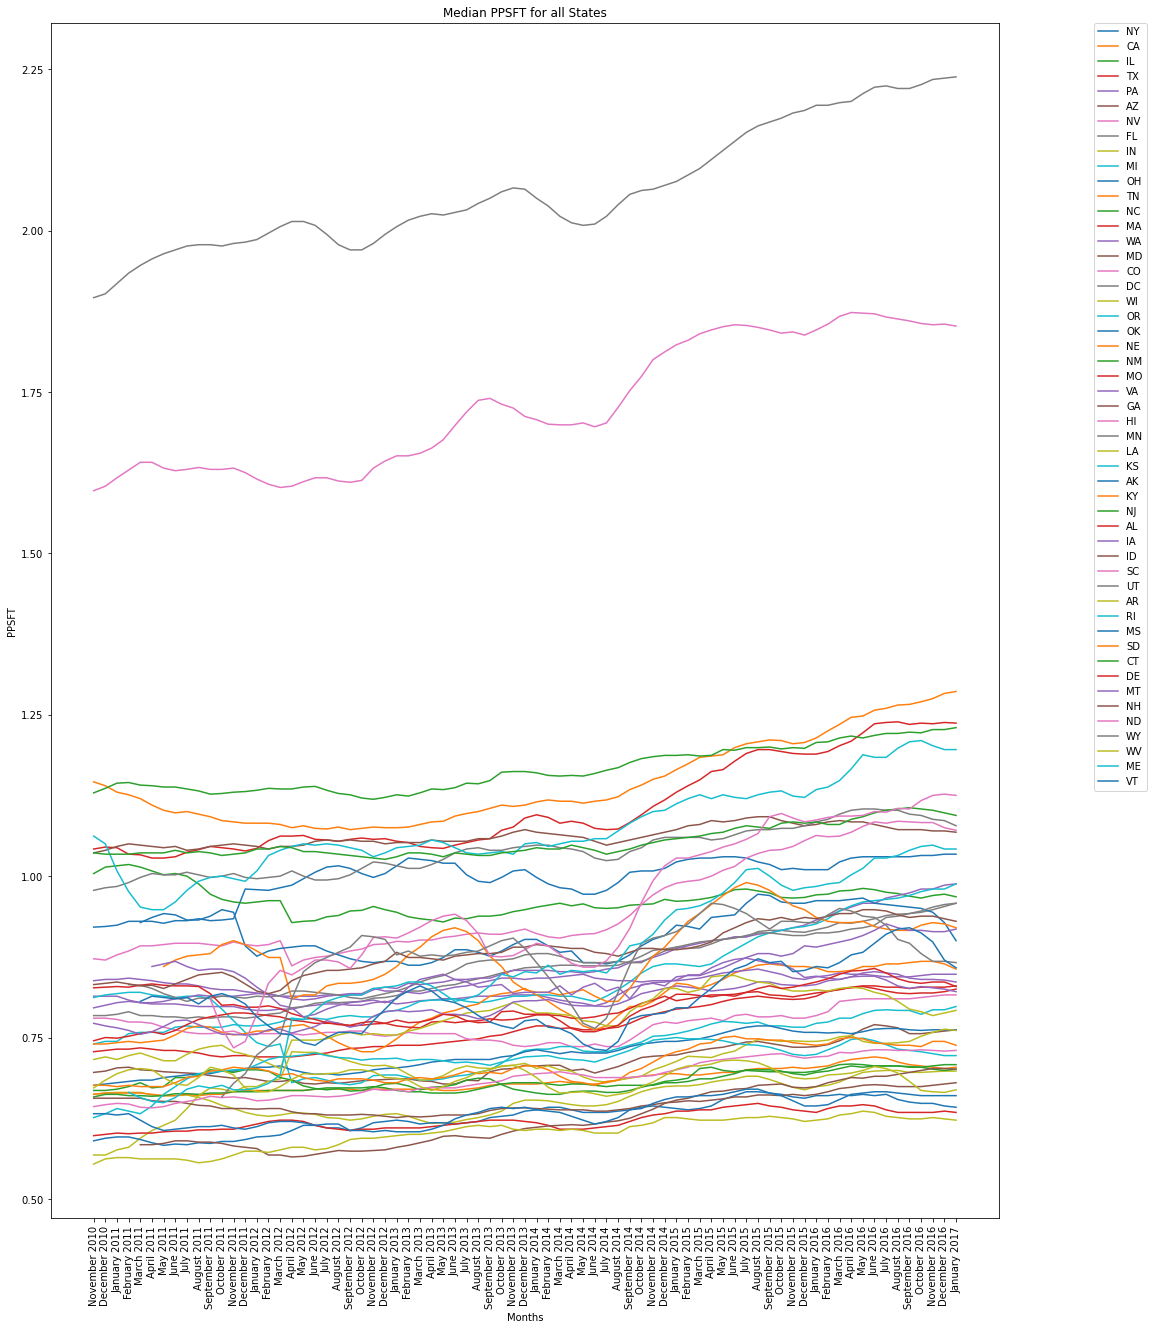

In [35]:
trace0 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "NY"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="NY")

trace1 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "CA"][months], axis=0), mode='markers', marker=dict(size=3),
                    name="CA")
trace2 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "HI"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="HI")

trace3 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "DC"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="DC")

trace4 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "AZ"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="AZ")

trace5 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "FL"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="FL")

trace6 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "TX"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="TX")

trace7 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "IL"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="IL")

trace8 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "NC"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="NC")

trace9 = go.Scatter(x=months,
                    y=np.nanmedian(df[df["State"] == "NV"][months], axis=0),
                    mode='markers', marker=dict(size=3),
                    name="NV")
trace10 = go.Scatter(x=months,
                     y=np.nanmedian(df[df["State"] == "OK"][months], axis=0),
                     mode='markers', marker=dict(size=3),
                     name="OK")

layout = go.Layout(title="Median PPSFT for top 20 States", xaxis=dict(title="PPSFT"),
                   yaxis=dict(title="Months"))
data = [trace0, trace1, trace2, trace3, trace4,
        trace5, trace6, trace7, trace8, trace9, trace10]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


#Matplotlib plot
plt.figure(figsize=(17, 22))

for st in states:
    st_pick = df[df["State"] == st][months]
    plt.plot(months, np.nanmedian(st_pick, axis=0), label=st)

plt.title("Median PPSFT for all States")
plt.xlabel("Months")
plt.ylabel("PPSFT")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
plt.show()


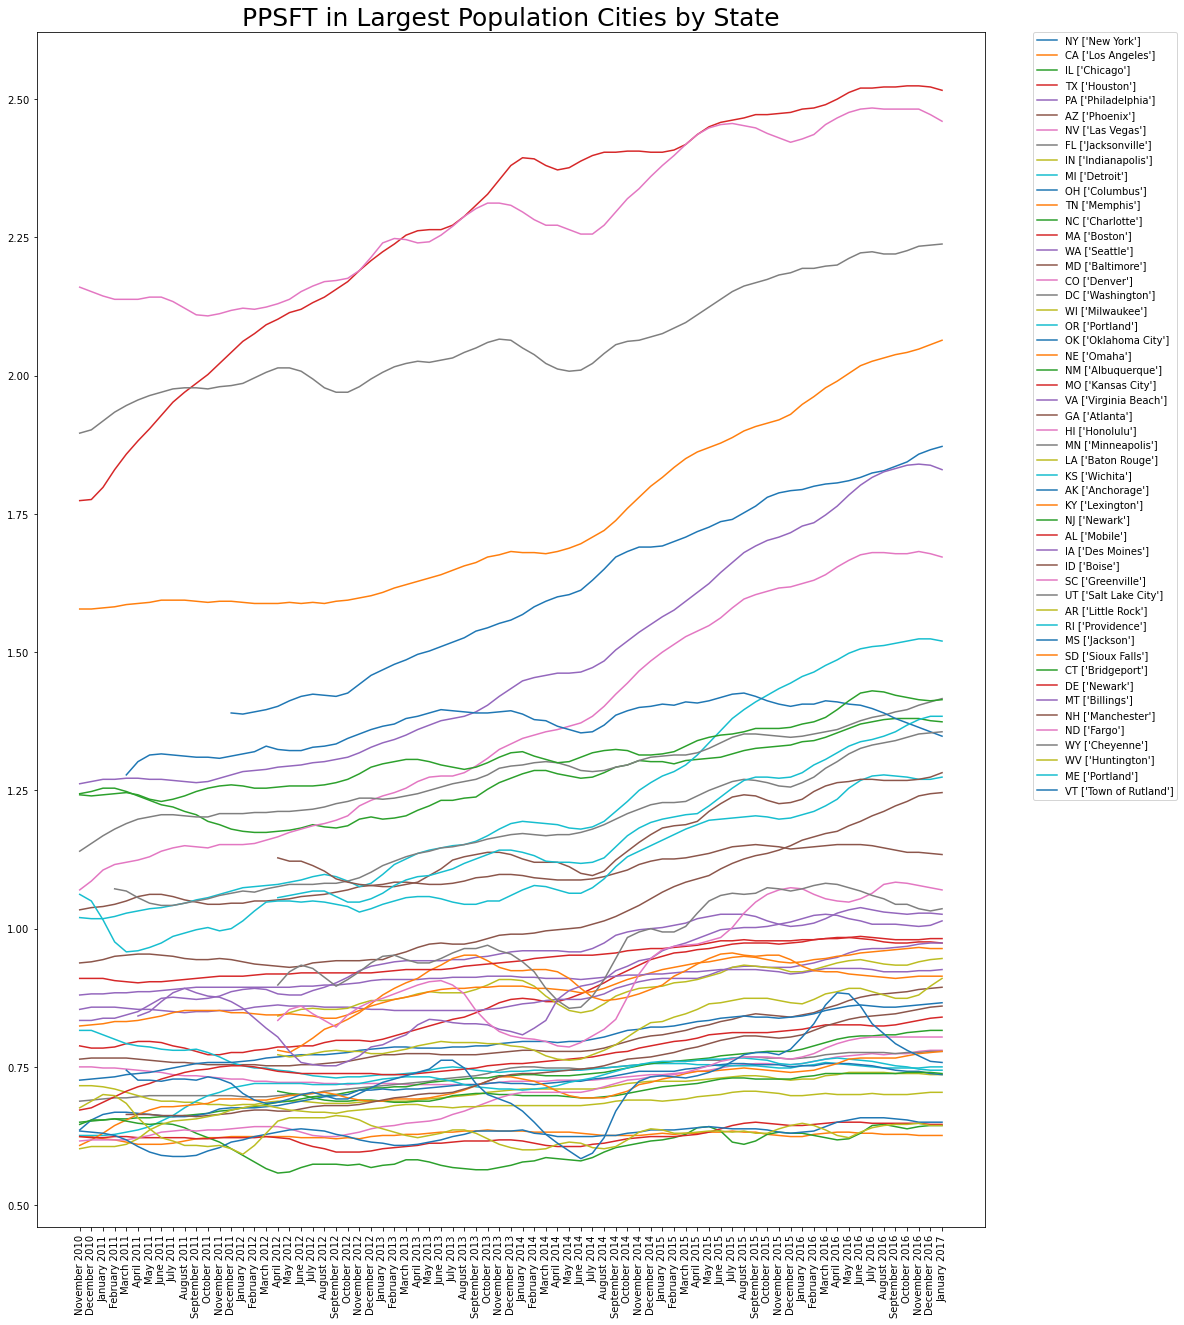

In [36]:
plt.figure(figsize=(17, 22))
for s in states:
    pr = df[df["State"] == s]
    r = min(pr["Population Rank"])
    pr = pr[pr["Population Rank"] == r]
    label = "{} {}".format(s, pr["City"].unique())
    pr = pr[months]
    plt.plot(pr.columns, np.transpose(pr.values), label=label)

plt.title("PPSFT in Largest Population Cities by State", fontsize=25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy

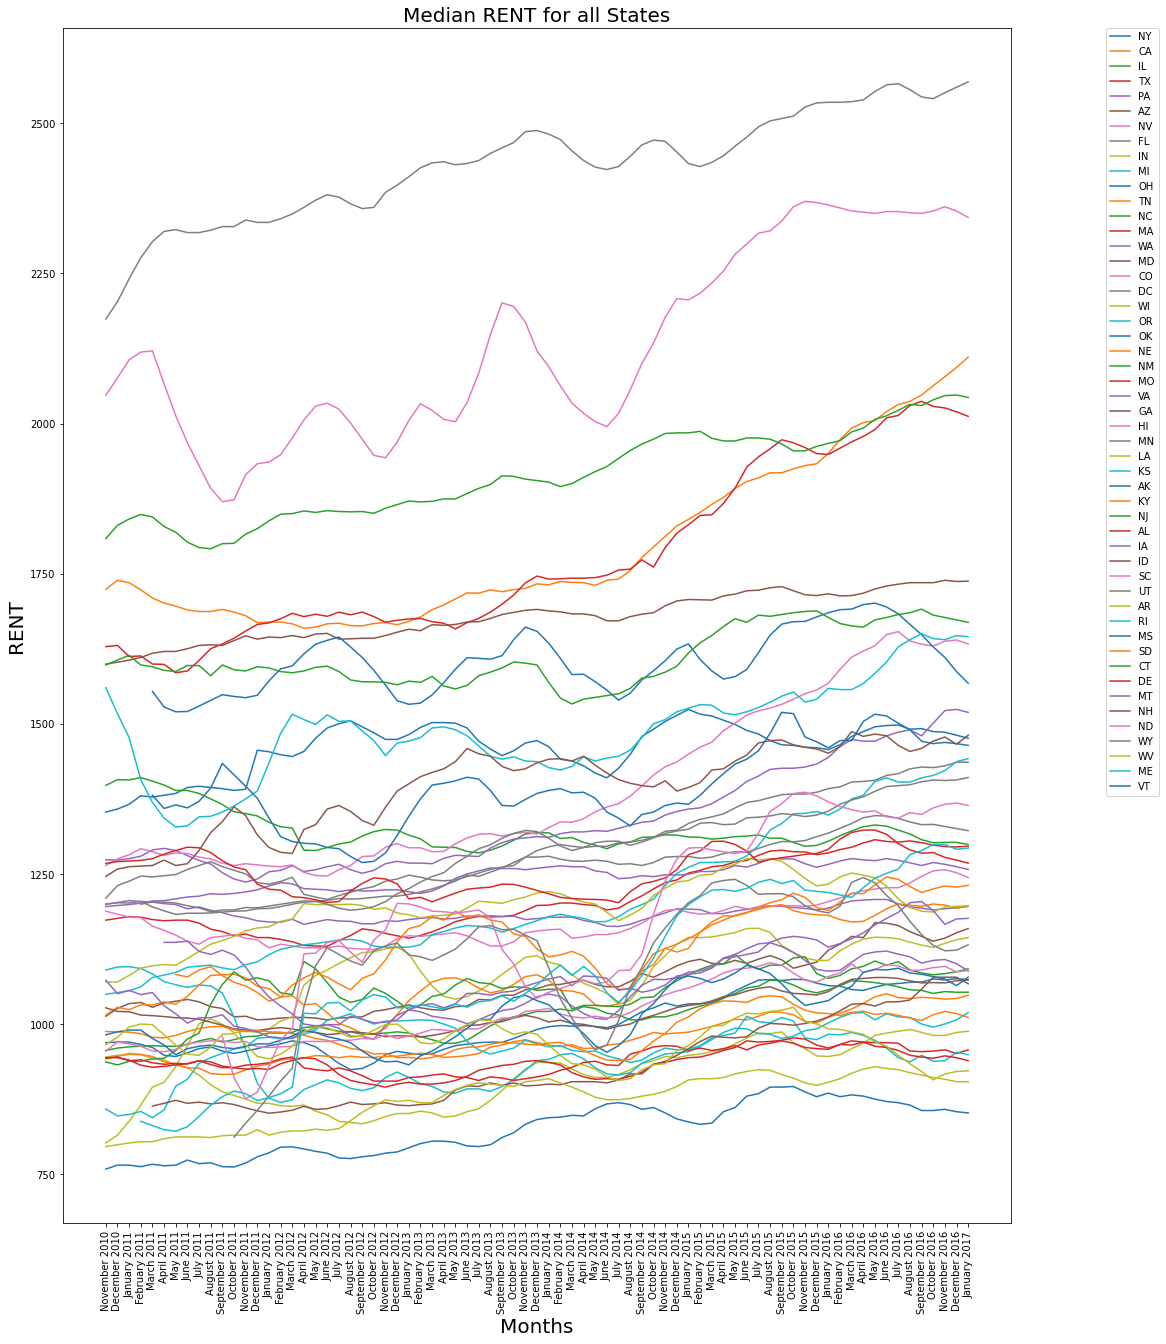

In [37]:
trace0 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "NY"][months], axis=0), name="NY")

trace1 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "CA"][months], axis=0), name="CA")
trace2 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "HI"][months], axis=0), name="HI")

trace3 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "DC"][months], axis=0), name="DC")

trace4 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "AZ"][months], axis=0), name="AZ")

trace5 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "FL"][months], axis=0), name="FL")

trace6 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "TX"][months], axis=0), name="TX")

trace7 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "IL"][months], axis=0), name="IL")

trace8 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "NC"][months], axis=0), name="NC")

trace9 = go.Scatter(x=months,
                    y=np.nanmedian(df_rent[df_rent["State"] == "NV"][months], axis=0), name="NV")

trace10 = go.Scatter(x=months,
                     y=np.nanmedian(df_rent[df_rent["State"] == "OK"][months], axis=0), name="OK")

layout = go.Layout(title="Median RENT for top 20 States", xaxis=dict(title="RENT"),
                   yaxis=dict(title="Months"))
data = [trace0, trace1, trace2, trace3, trace4,
        trace5, trace6, trace7, trace8, trace9, trace10]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#Matplotlib plot
plt.figure(figsize=(17, 22))

for st in states:
    st_pick = df_rent[df_rent["State"] == st][months]
    plt.plot(months, np.nanmedian(st_pick, axis=0), label=st)

plt.title("Median RENT for all States", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.ylabel("RENT", fontsize=20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
plt.show()


Let's Explore a state on the West Coast, California

In [38]:
cal = df[df["State" ]== "CA"]
cal.head(10)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
8,54296,San Diego,San Diego,San Diego,CA,9,1.492,1.494,1.492,1.490,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
10,33839,San Jose,San Jose,Santa Clara,CA,11,1.542,1.546,1.540,1.530,...,2.224,2.234,2.242,2.246,2.246,2.240,2.232,2.224,2.210,2.200
12,20330,San Francisco,San Francisco,San Francisco,CA,13,2.502,2.526,2.516,2.468,...,3.594,3.590,3.588,3.580,3.564,3.542,3.518,3.498,3.466,3.442
33,18203,Fresno,Fresno,Fresno,CA,34,0.840,0.838,0.832,0.822,...,0.814,0.816,0.816,0.818,0.820,0.820,0.822,0.822,0.822,0.824
34,20288,Sacramento,Sacramento,Sacramento,CA,35,0.918,0.926,0.928,0.930,...,1.074,1.082,1.088,1.094,1.100,1.104,1.108,1.112,1.114,1.118
36,46298,Long Beach,Los Angeles,Los Angeles,CA,37,1.594,1.590,1.588,1.586,...,1.882,1.888,1.890,1.894,1.898,1.906,1.916,1.928,1.938,1.950
42,13072,Oakland,San Francisco,Alameda,CA,43,1.396,1.404,1.414,1.424,...,2.212,2.244,2.276,2.300,2.318,2.330,2.344,2.356,2.360,2.358
53,16764,Anaheim,Los Angeles,Orange,CA,54,1.464,1.466,1.466,1.466,...,1.754,1.762,1.770,1.776,1.782,1.788,1.792,1.794,1.800,1.806
54,47568,Santa Ana,Los Angeles,Orange,CA,55,1.566,1.564,1.566,1.568,...,1.946,1.956,1.964,1.966,1.966,1.966,1.970,1.972,1.978,1.986


C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning:

All-NaN slice encountered

C:\Users\ehino\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning:

Mean of empty slice



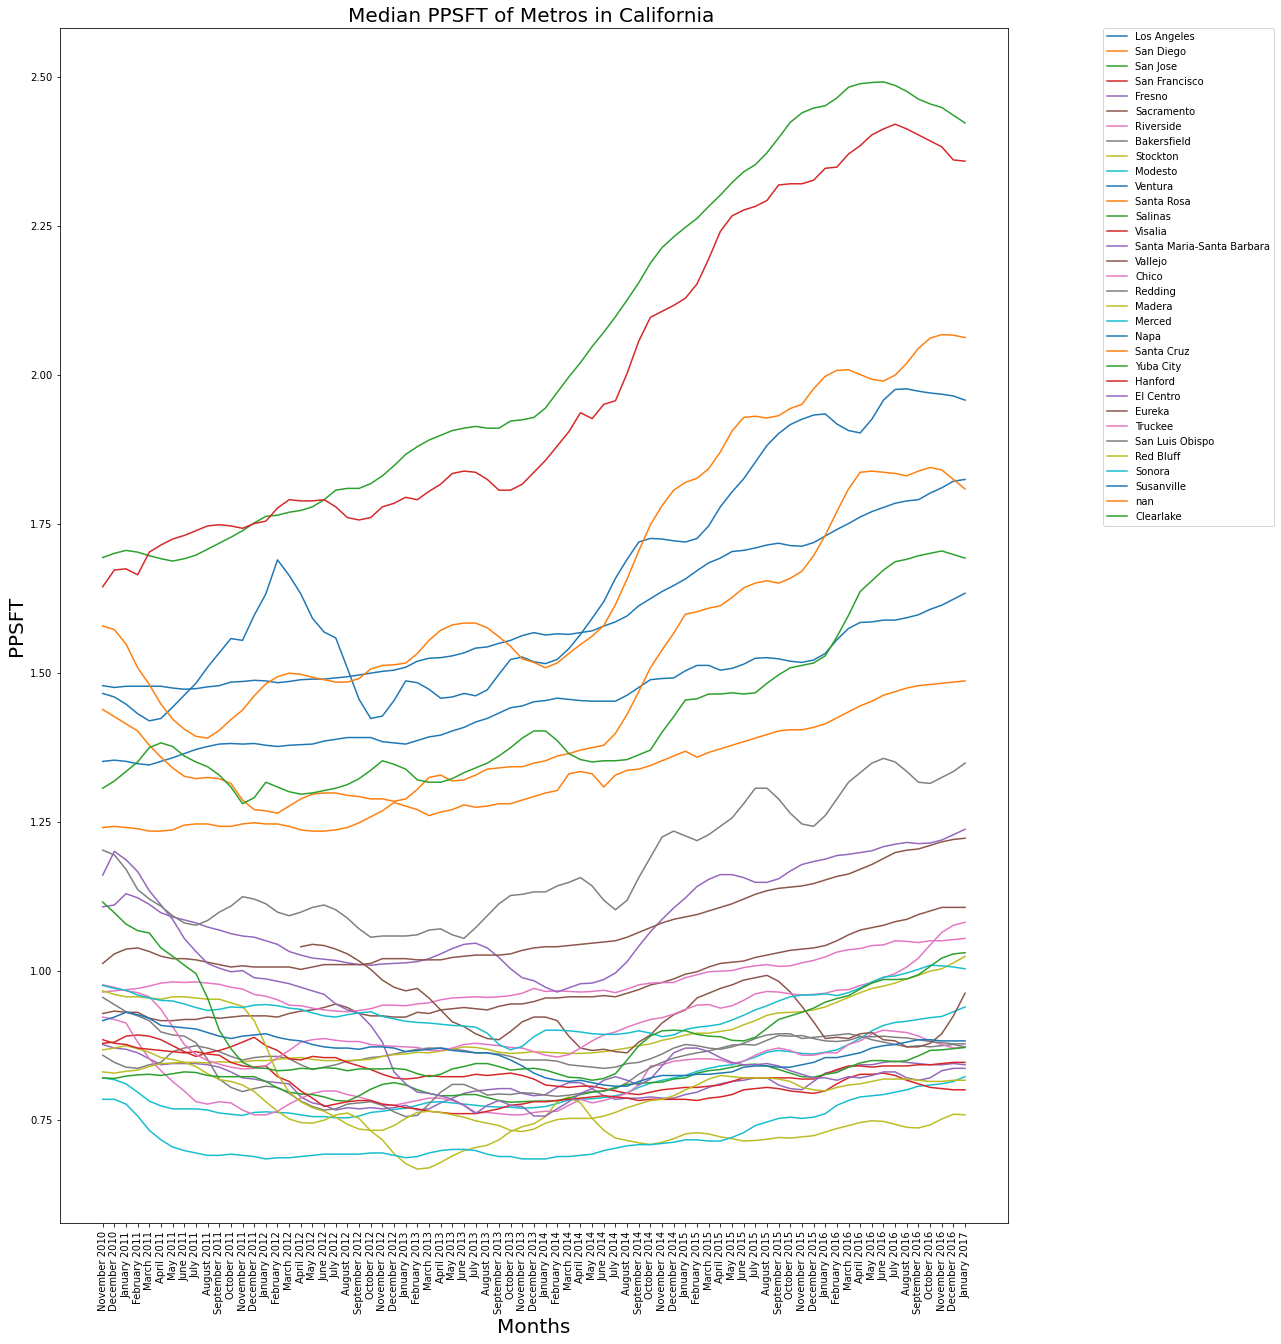

In [39]:
cal_met = cal["Metro"].unique()
#cal_met

plt.figure(figsize=(17, 22))
for met in cal_met:
    met_price = cal[cal["Metro"] == met][months]
    plt.plot(months, np.nanmedian(met_price, axis=0), label=met)


plt.title("Median PPSFT of Metros in California ", fontsize=20)

plt.xlabel("Months", fontsize=20)
plt.ylabel("PPSFT", fontsize=20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
plt.show()


Why median prices?